# Convolutional Neural Network

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import mnist
%matplotlib inline

### Load Images and create kernels

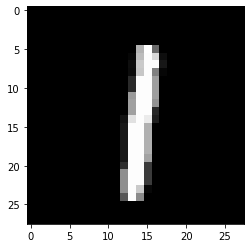

In [3]:
image = mnist.train_images()[40]
plt.imshow(image / 255 - .5, cmap='gray')

### Convolution
Funtion to perform a convolution for each kernel in kernelArray

In [68]:
def singleConvolution(image, kernel):
    imageW, imageH = image.shape
    kernelW, kernelH = kernel.shape
    
    convolvedImage = np.zeros((imageW-kernelW, imageH-kernelH))
    
    for i in range(imageW-kernelW):
        for j in range(imageH-kernelH):
            auxMatrix = image[i:i+kernelW,j:j+kernelH] * kernel
            convolvedImage[i, j] = auxMatrix.sum()
    return convolvedImage
            

def convolveImage(image, kernelArray):
    normalizedImage = (image / 255) - .5
    return np.array([ singleConvolution(normalizedImage, kernel) for kernel in kernelArray ])
    

### Random Kernels

In [5]:
NUMBER_KERNELS = 4
kernels = np.random.randn(NUMBER_KERNELS,3,3) / 9

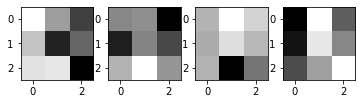

In [6]:
fig, axs = plt.subplots(1, min(NUMBER_KERNELS, 7))
for i in range(min(NUMBER_KERNELS, 7)):
    axs[i].imshow(kernels[i], cmap='gray')

### Apply kernels into the image

In [7]:
imagesConvolved = convolveImage(image, kernels)

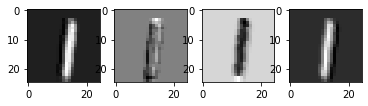

In [8]:
fig, axs = plt.subplots(1, min(NUMBER_KERNELS, 7))
for i in range(min(NUMBER_KERNELS, 7)):
    axs[i].imshow(imagesConvolved[i], cmap='gray')

### Pooling 
Apply an algorithm to group or reduce similar values to a simpler image

In [9]:
def pool(image, size = 2, function = np.max):
    w, h = image.shape
    sizeHorizontal = w // size
    sizeVertical = h // size

    ansImage = np.zeros([sizeVertical, sizeHorizontal])

    for i in range(sizeHorizontal):
        for j in range(sizeVertical):
            ansImage[i,j] = function(image[i*size:(i+1)*size, j*size:(j+1)*size])
    return ansImage

def poolImages(images, function=np.max):
    return np.array([pool(image, function=function, size = 2) for image in images])

### Apply pooling to the convolved images

In [10]:
imagesPooled = poolImages(imagesConvolved, function=np.median)

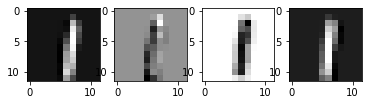

In [11]:
fig, axs = plt.subplots(1, min(NUMBER_KERNELS, 7))
for i in range(min(NUMBER_KERNELS, 7)):
    axs[i].imshow(imagesPooled[i], cmap='gray')

### Neural Layer
Now each processed image is flatted into a single array, and all pixel is treated as an input in our neural network

![Network configuration](images/CNN.svg)

In [12]:
def generateWeights(imageShape, output):
    inputlayer = np.prod(imageShape)
    weights = np.random.randn(inputlayer, output)
    return pd.DataFrame(weights)

### Generate weights for conections

In [13]:
weights = generateWeights(imagesPooled.shape, 10)
weights.tail()

,0,1,2,3,4,5,6,7,8,9
571,0.652866,-0.998478,-0.248730,0.588795,0.394219,-1.193135,-0.289707,1.793065,0.694669,1.028707
572,0.502456,0.839631,-1.580093,0.199965,-0.858430,1.163474,1.800552,-0.406936,1.812126,-0.934297
573,-0.765382,-0.527978,-0.284412,0.264455,2.377836,0.254830,-0.348581,1.676422,-0.663530,-0.178593
574,-0.692090,1.583287,-0.036685,-0.029070,-1.007621,-0.362633,0.925810,-0.374015,-0.740922,-0.043497
575,-2.678384,-0.144844,0.818302,0.718110,-1.828796,0.518647,-0.564932,-0.736259,-0.156037,-1.212887


### Apply weiths and cross-entropy to the image

In [14]:
def forwardSoftmax(imageDf, weightsDf):
    totals = ( 
        imageDf
        .dot(weightsDf)
        .apply(np.exp)
    )
    return totals / float(totals.sum(axis=1))

### Flat the image in a single array as the input layer of the CNN

In [15]:
imageDf = pd.DataFrame(imagesPooled.flatten()).transpose()
imageDf

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,...,-0.171052,-0.171052,-0.171052,-0.060031,-0.005649,-0.219892,-0.171052,-0.171052,-0.171052,-0.171052


### Apply forward algorithm

In [16]:
forwardSoftmax(imageDf, weights)

,0,1,2,3,4,5,6,7,8,9
0,0.999112,0.000019,0.000126,2.816080e-08,0.000239,3.052595e-07,0.000499,0.000005,8.582135e-07,1.728008e-07


# Test CNN 

In [17]:
test_images = mnist.test_images()[:1000]
test_labels = mnist.test_labels()[:1000]

In [69]:
def prepareImage(image):
    imageConvolved = convolveImage(image,kernels)
    imagePooled = poolImages(imageConvolved, function=np.max)
    return imagePooled.flatten()

In [79]:
weights

,0,1,2,3,4,5,6,7,8,9
0,0.478256,0.845634,-0.597701,0.378915,-0.432908,-0.216852,0.971986,-0.135423,-0.635579,-0.311095
1,-0.214386,-0.488542,1.641789,-0.617668,-0.843665,-0.771466,-0.594690,0.544276,-0.866168,0.617306
2,-0.794148,-0.211634,-0.904875,-0.711840,-0.229957,-0.326564,0.183993,1.202249,-0.142644,-1.508708
3,-1.118357,1.711984,-1.259914,0.015601,-0.138437,-0.019119,0.006854,-0.577022,1.170041,0.689370
4,-0.634509,0.599129,-2.172811,0.251902,-0.177060,0.178716,-0.231248,-2.526477,-1.103954,0.702609
5,0.076001,0.900455,-0.184874,-1.311804,-0.394881,-1.432896,-0.939953,0.772235,-0.750568,1.577485
6,-2.239411,-0.012080,0.580557,-1.772731,-0.283073,1.802841,1.782210,1.864209,0.015576,-1.504798
7,-1.437991,1.355580,-2.221471,-1.105637,-0.411391,0.914435,-1.028620,-0.574788,-1.582570,-0.865349
8,0.727799,-0.950118,-0.666853,-0.314605,-0.249840,-0.987978,-1.087409,-0.246369,0.930810,-1.101818
9,1.199044,0.973139,-0.249387,2.091078,-0.160246,-1.252630,0.154418,3.247332,-0.689257,0.417189


In [77]:
preparedImages = map(prepareImage, test_images)
imagesDf = pd.DataFrame(preparedImages)
imagesDf

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,...,-0.171052,-0.171052,0.051796,0.240700,0.041170,-0.171052,-0.171052,-0.171052,-0.171052,-0.171052
1,-0.361711,-0.361711,-0.361711,-0.361711,-0.327561,-0.246271,-0.016610,-0.076157,-0.286440,-0.361711,...,-0.171052,-0.168596,-0.107708,-0.137589,-0.080473,-0.104064,-0.147161,-0.140191,-0.171052,-0.171052
2,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,...,-0.171052,-0.171052,-0.130508,0.054117,-0.173763,-0.171052,-0.171052,-0.171052,-0.171052,-0.171052
3,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,...,-0.171052,-0.136159,-0.017002,-0.005470,-0.070936,-0.085423,-0.171052,-0.171052,-0.171052,-0.171052
4,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,...,-0.171052,-0.171052,-0.171052,-0.171052,-0.171052,0.113946,0.006576,-0.171052,-0.171052,-0.171052
5,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,...,-0.171052,-0.171052,-0.126400,0.134439,-0.104059,-0.171052,-0.171052,-0.171052,-0.171052,-0.171052
6,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,...,-0.171052,-0.171052,-0.171052,-0.105007,0.181569,-0.029815,-0.068041,-0.171052,-0.171052,-0.171052
7,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,...,-0.171052,-0.171052,-0.171052,-0.171052,-0.171052,-0.171052,-0.170615,0.087121,0.198546,-0.172572
8,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,...,-0.171052,-0.171052,-0.171052,-0.155458,-0.032955,-0.049452,-0.169686,-0.171052,-0.171052,-0.171052
9,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,-0.361711,...,-0.171052,-0.021699,0.261158,0.116027,-0.162062,-0.171052,-0.171052,-0.171052,-0.171052,-0.171052


In [88]:
sumations = pd.DataFrame(imagesDf.sum(axis=1))
labels = pd.DataFrame(test_labels)
imagesDf.dot(weights)

,0,1,2,3,4,5,6,7,8,9
0,9.512309,-0.956426,6.784142,-9.209242,0.950066,-7.175303,3.875242,-1.509124,-5.061502,1.451315
1,6.225394,0.973188,2.737266,-3.626157,0.865259,0.939297,2.475374,-0.467541,-1.618582,-0.795721
2,12.844973,2.954006,3.993522,-4.628955,2.238246,-2.712937,3.923226,-1.942328,-2.918624,-3.776642
3,-2.734647,0.820901,4.833398,-7.401112,-1.614262,-4.220841,4.129432,1.504427,5.261578,2.611597
4,6.530209,0.504631,5.651693,-11.587456,-2.290104,-5.729824,0.614316,-3.194239,3.235520,-0.155260
5,12.806554,3.452910,4.121055,-4.571964,2.947960,-4.422180,2.635426,-2.267797,-4.025840,-3.959823
6,8.570871,-1.615343,2.606719,-8.769847,2.517448,-7.945109,4.748348,1.753852,-1.173309,-1.261306
7,3.455594,6.429548,0.886199,-6.774778,0.484496,-4.703159,1.081049,1.743845,-2.363045,-7.406539
8,0.241736,-1.876914,8.034831,-6.357364,-0.684140,1.615895,0.483689,-4.985821,-0.072873,5.360574
9,4.054064,2.654753,3.838943,-7.284150,0.354309,-7.564616,1.464009,-2.901565,-4.985123,1.041269
